## Time series with Pandas

For this lab, we are going to analyse some data about the Arstotzka country. Arstotzka is a communist country in the border with Kolechia.

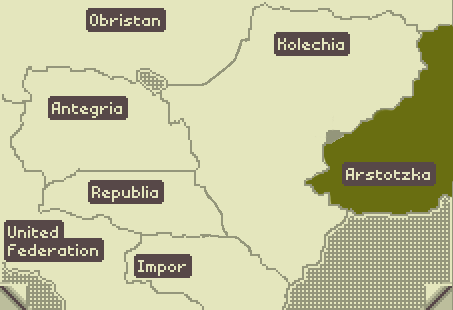

Both countries have a volatile relationship. Crossing the border between the two countries had been impossible, even for Arstotzkan citizens, until November 23rd, 1982 when Arstotzka opened a checkpoint to allow entry from Kolechia. Crossing data has been collected since then. The Arstotzka government has hired you to help them understand emigration patterns and gain insights into their data.

### Task 1

Load the `arstotzkan.csv` file [here](https://drive.google.com/file/d/1cdtzQ6OqG5pTX9d7y823L4TxKKHceLEw/view?usp=sharing). Explore the structure, check for missing values, and provide a summary of basic statistics

In [133]:
import pandas as pd
df = pd.read_csv('arstotzkan.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Name,Age,Civil_Status,Annual_Income,Profession,Blood_Type,Height,Distance_to_Border,Date_Time_Record
0,0,Elena Romanov,54,Married,100000,Government doctor,O,185.814280,7.790332,1982-11-23 11:00:00.000000
1,1,Nikolai Kozlov,60,Divorced,100000,Government cook,O,170.521605,22.825996,1982-12-01 07:00:00.000000
2,2,Konstantin Smirnov,60,Married,100000,Government surveillance assistance,AB,189.394686,3.408943,1982-12-01 21:00:00.000000
3,3,Olga Novikov,60,Married,100000,Government surveillance assistance,O,188.491613,21.275192,1982-12-15 06:00:00.000000
4,4,Vladimir Bogdanov,60,Married,100000,Government surveillance assistance,O,162.293967,11.981236,1982-12-16 18:00:00.000000


In [134]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0            0
Name                  0
Age                   0
Civil_Status          0
Annual_Income         0
Profession            0
Blood_Type            0
Height                0
Distance_to_Border    0
Date_Time_Record      0
dtype: int64


In [153]:
print(df.describe())

       Unnamed: 0          Age  Annual_Income       Height  \
count  6230.00000  6230.000000    6230.000000  6230.000000   
mean   3114.50000    55.966613   98418.615891   170.017163   
std    1798.59042    10.118903    9146.162502    11.521855   
min       0.00000    18.000000   20155.000000   150.002034   
25%    1557.25000    60.000000  100000.000000   160.069443   
50%    3114.50000    60.000000  100000.000000   169.894327   
75%    4671.75000    60.000000  100000.000000   180.060440   
max    6229.00000    60.000000  100000.000000   189.998002   

       Distance_to_Border  moving_average     Quantile  
count         6230.000000             0.0  6230.000000  
mean            53.837731             NaN     1.500000  
std             97.891786             NaN     1.118267  
min              1.002240             NaN     0.000000  
25%             10.608903             NaN     0.250000  
50%             20.205619             NaN     1.500000  
75%             40.256592             NaN 

In [158]:
def summarize_nominal(col):
    _counts = df[col].value_counts()
    _percent = df[col].value_counts(normalize=True) * 100
    
    # Create a summary DataFrame
    return pd.DataFrame({
        'Count': _counts,
        'Percent': _percent
    })

print(summarize_nominal('Civil_Status'))
print(summarize_nominal('Blood_Type'))
print(summarize_nominal('Profession'))

              Count    Percent
Civil_Status                  
Divorced       1601  25.698234
Married        1570  25.200642
Single         1556  24.975923
Widowed        1503  24.125201
            Count    Percent
Blood_Type                  
O            1596  25.617978
A            1558  25.008026
AB           1555  24.959872
B            1521  24.414125
                                    Count    Percent
Profession                                          
Government surveillance assistance   2439  39.149278
Government social researcher         1397  22.423756
Government cook                       430   6.902087
Government doctor                     401   6.436597
Government IT technician              399   6.404494
Government employee                   392   6.292135
Government history writer             387   6.211878
Government teacher                    385   6.179775


### Task 2

**a)** Create a time series plot for the emigration data over the entire period. Show the number of records by Year. To get the number of records you can use [resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) and then get apply `size` method. You will need to set the dataframe index as the `Date_Time_Record` as a datetime type. Lastly, customize the plot with labels, titles, and legends. (3
 marks)

In [136]:
df['Date_Time_Record'] = pd.to_datetime(df['Date_Time_Record'])

# Set 'Date_Time_Record' as the index
df = df.set_index('Date_Time_Record')
print (df.index.min())
print (df.index.max())

1982-11-23 11:00:00
2022-12-19 00:11:59.999999


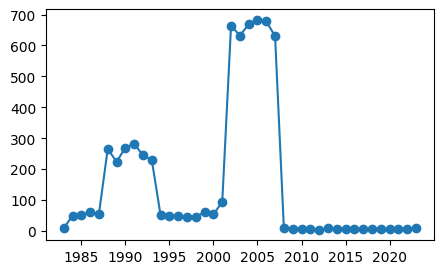

In [137]:
import matplotlib.pyplot as plt
# Count records by year

# Resample by year and count records
records_by_year = df.resample('YE').size()


# Create the time series plot
plt.figure(figsize=(5, 3))

# Plot the original data
plt.plot(records_by_year.index, records_by_year.values, marker='o', label='Original Data')
plt.show()

**b**) Using the previous plot, apply a moving average to smooth out short-term fluctuations in the data. Select a window size that captures variation observed in the previous plot. Compare the original time series with the smoothed version. (3 marks)

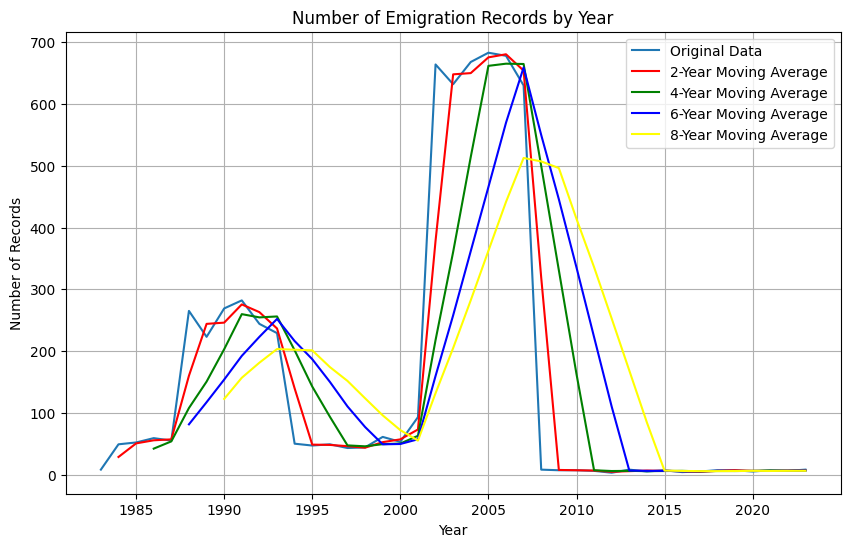

In [138]:
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(records_by_year.index, records_by_year.values, label='Original Data')

# Plot the moving average
color_map = ['', 'red', 'green', 'blue', 'yellow']
for i in range(1,5):
    moving_average = records_by_year.rolling(window=i*2).mean()
    plt.plot(moving_average.index, moving_average.values, color=color_map[i], label=f'{i*2}-Year Moving Average')

plt.title('Number of Emigration Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.show()

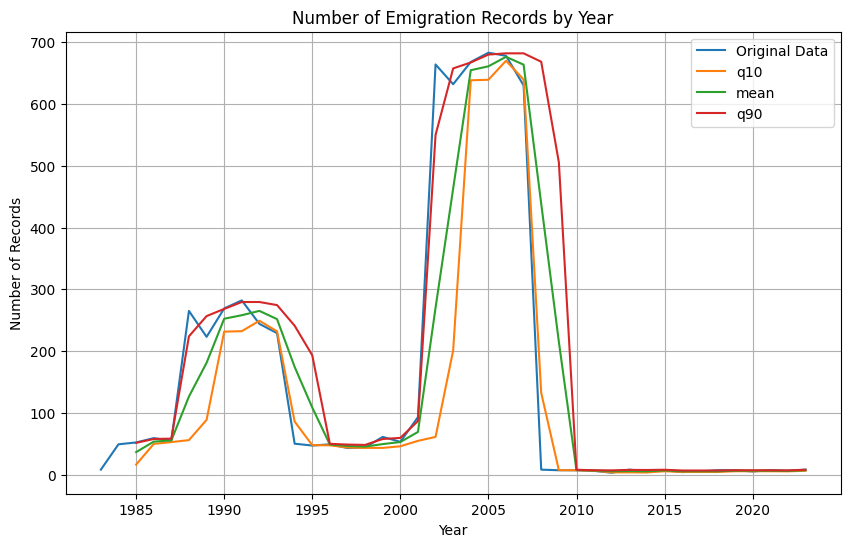

In [139]:
import numpy as np
plt.figure(figsize=(10, 6))

moving_average = records_by_year.rolling(window=3)
q10 = moving_average.quantile(0.1).to_frame("q10")
mean = moving_average.mean().to_frame("mean")
q90 = moving_average.quantile(0.9).to_frame("q90")

# Plot the original data
plt.plot(records_by_year.index, records_by_year.values, label='Original Data')
plt.plot(q10.index, q10.values,  label='q10')
plt.plot(mean.index, mean.values,  label='mean')
plt.plot(q90.index, q90.values,  label='q90')


df["moving_average"]=moving_average.mean()


plt.title('Number of Emigration Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.show()

**c**) Implement the same graph in a), but resampled by Day. Which one gives a better insight into the data? Why? (3 marks)

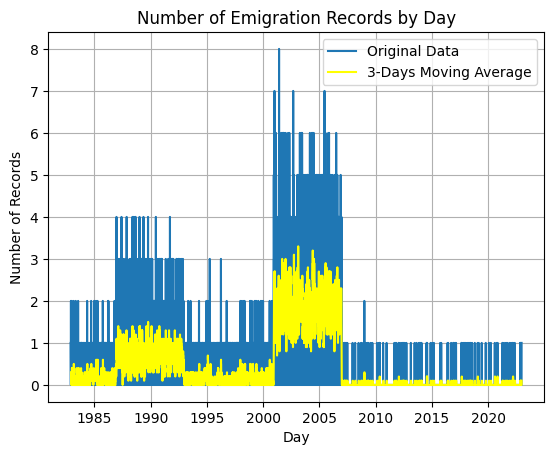

In [140]:
records_by_day = df.resample('D').size()
moving_average = records_by_day.rolling(window=10).mean()

plt.plot(records_by_day.index, records_by_day.values,  label='Original Data')
plt.plot(moving_average.index, moving_average.values, color='yellow', label=f'{3}-Days Moving Average')

plt.title('Number of Emigration Records by Day')
plt.xlabel('Day')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.show()

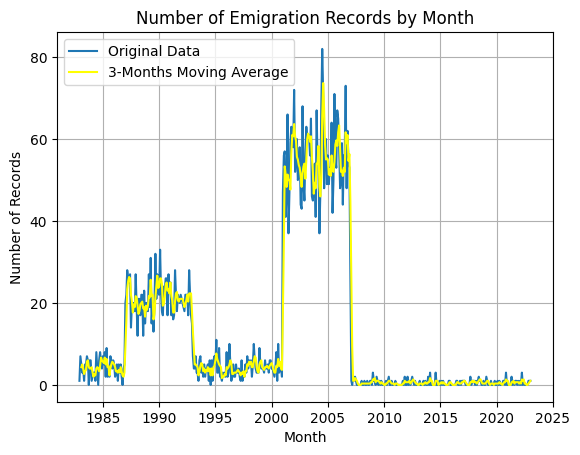

In [141]:
records_by_month = df.resample('ME').size()
moving_average = records_by_month.rolling(window=3).mean()

plt.plot(records_by_month.index, records_by_month.values, label='Original Data')
plt.plot(moving_average.index, moving_average.values, color='yellow', label=f'{3}-Months Moving Average')

plt.title('Number of Emigration Records by Month')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.show()

### Task 3

**a**) Given the age groups below, plot the number of emigration records for each group over annual periods. Is there any difference in patter for the different groups? (3 marks)

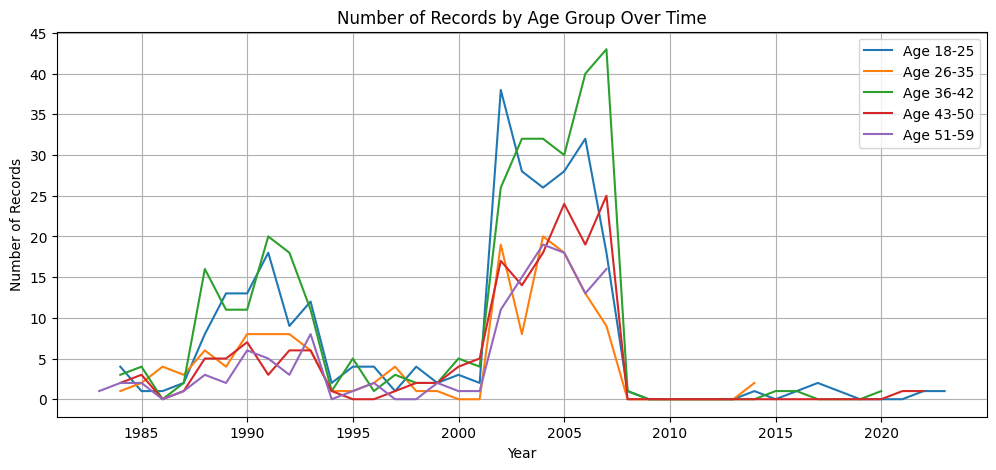

In [142]:
import matplotlib.ticker as ticker
age_groups = [(18, 25), (26, 35), (36, 42), (43, 50), (51, 59)]
#age_groups = [(26, 35), (51, 59)]
# Create a figure and axes for the plot
plt.figure(figsize=(12, 5))

# Iterate over age groups and plot the data
for age_group in age_groups:
    # Filter data for the current age group
    df_by_age_group = df[(df['Age'] >= age_group[0]) & (df['Age'] <= age_group[1])]

    # Resample by year and count records
    records_by_year = df_by_age_group.resample('YE').size()

    # Plot the data for the current age group
    plt.plot(records_by_year.index, records_by_year.values, label=f'Age {age_group[0]}-{age_group[1]}')

# Set plot labels and title
plt.title('Number of Records by Age Group Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Show the plot
plt.show()

It seems all the age groups have the same pattern. While genearlly the numbers are low, we can observe 3 quiet periods, 1982-1986, 1994-2001, 2008-2022 and 2 "spike" periods; 1987-1993, 2002-2007. We can also observe after the year 2014 the age group 51-59 has no emigration records

**b**) Based on the summary statistics of the data, try to create different groups for other attributes in the data. Investigate if there is any emigration patterns for various demographic groups (e.g. income levels, professions, etc). (3 marks)

**c**) Does the distance to the border impact the number of records over time? (3 marks)

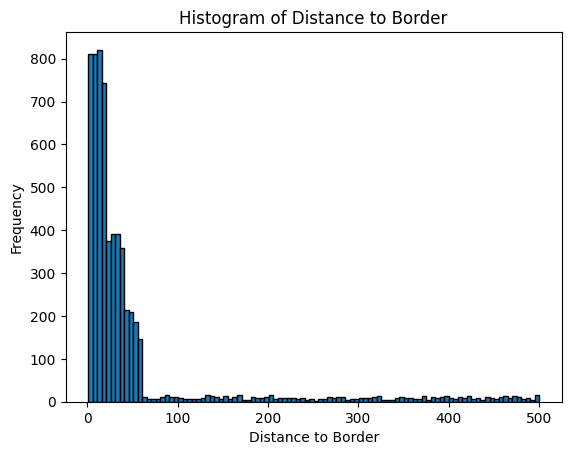

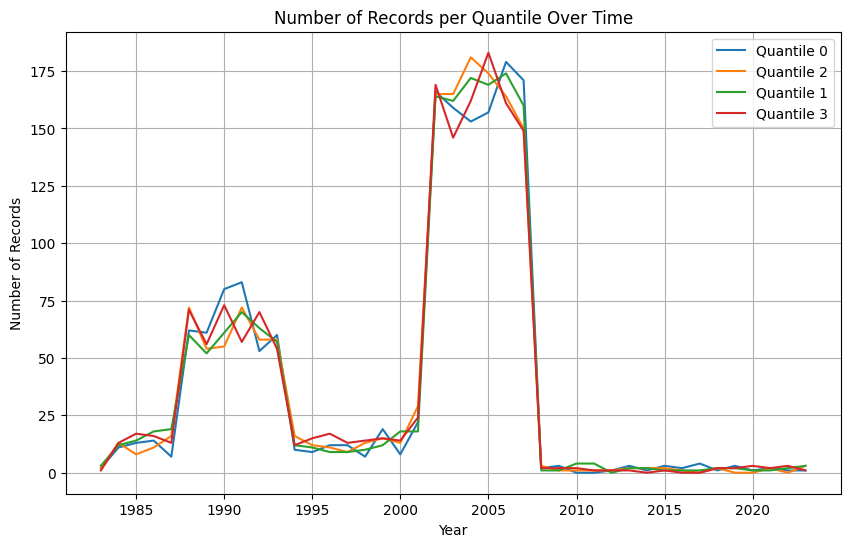

In [148]:
# Create the histogram
plt.hist(df['Distance_to_Border'], bins=100, edgecolor='black') 

# Add labels and title
plt.xlabel('Distance to Border')
plt.ylabel('Frequency')
plt.title('Histogram of Distance to Border')

# Show the plot
plt.show()


df['Quantile'] = pd.qcut(df['Distance_to_Border'], 4, labels=False)

fig, ax = plt.subplots(figsize=(10, 6))

for quantile in df['Quantile'].unique():
    df_quantile = df[df['Quantile'] == quantile].resample('YE').size()
    ax.plot(df_quantile.index, df_quantile.values, label=f'Quantile {quantile}')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Records')
ax.set_title('Number of Records per Quantile Over Time')
plt.grid(True)
ax.legend()

# Display only integer values on the y-axis
import matplotlib.ticker as ticker
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


### Task 4

**a**) Given the record count per year, identify the 25th quantile and 75th quantile. You can use the [quantile](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) function after resampling and getting the size.  (3 marks)

In [108]:
# Calculate quantiles
q25 = records_by_year.quantile(0.25)
q75 = records_by_year.quantile(0.75)
print(q25)
print(q75)

7.0
229.0


**b**) Given the interquartile range (`75th percentile - 25th percentile`), calculate the lower and upper thresold to identify outliers. Values below `25th percentile - 1.5 * IQR` or above the `75th percentile + 1.5 * IQR` are usually considered outliers. (3 marks)

In [109]:
# Calculate IQR and thresholds
iqr = q75 - q25
lower_threshold = q25 - 1.5 * iqr
upper_threshold = q75 + 1.5 * iqr
print (lower_threshold, upper_threshold)


-326.0 562.0


**c)** Given the lower and uper bounds in b), plot the number of records per year with a line chart and overlay the outlier values using a scatter plot. (3 marks)

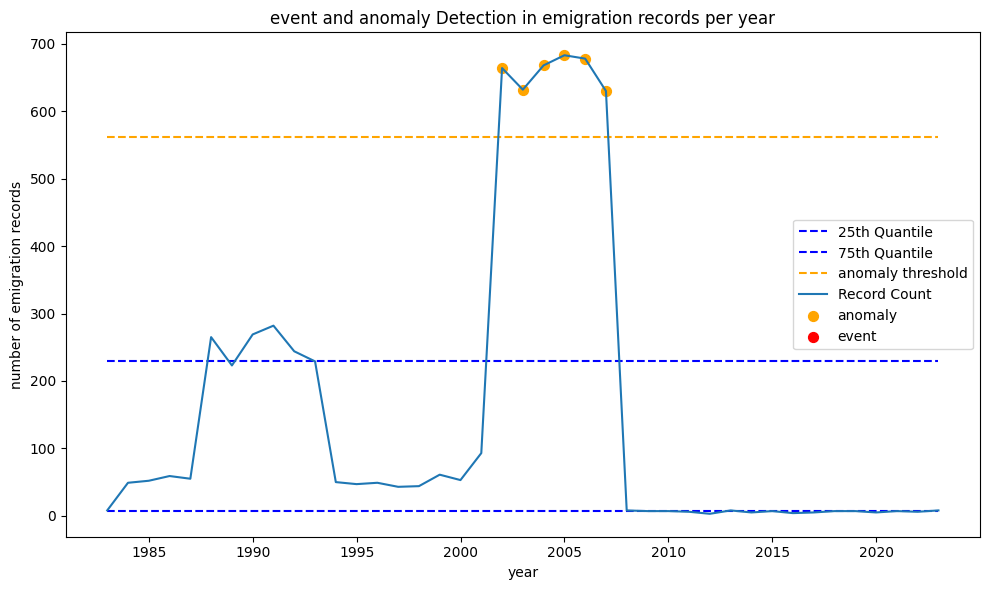

In [121]:
# Plot quantiles
plt.figure(figsize=(10, 6))
plt.plot(records_by_year.index, [q25] * len(records_by_year), label='25th Quantile', linestyle='--', color='blue')
plt.plot(records_by_year.index, [q75] * len(records_by_year), label='75th Quantile', linestyle='--', color='blue')
plt.plot(records_by_year.index, [upper_threshold] * len(records_by_year), label='anomaly threshold', linestyle='--', color='orange')

# Identify outliers
anomalies = records_by_year[(records_by_year > upper_threshold)]
events = records_by_year[(records_by_year < lower_threshold)]

# Plot record counts and outliers
plt.plot(records_by_year.index, records_by_year.values, label='Record Count', marker='')
plt.scatter(anomalies.index, anomalies.values, label='anomaly', color='orange', s=50)
plt.scatter(events.index, events.values, label='event', color='red', s=50)

# Add labels and legend
plt.xlabel('year')
plt.ylabel('number of emigration records')
plt.title('event and anomaly Detection in emigration records per year')
plt.legend()
plt.tight_layout()
plt.show()

### Task 5 (3 marks)

Based on your observation, write a short report to the government of Arstotzka. What are the most striking findings in the data? What could be some future recommendations to the Arstotzkan government, in order to maintain emigration levels controlled?